In [214]:
import numpy as np
from PIL import Image 
from matplotlib import pyplot as plt

In [215]:
def create_haralic_matrix(image, d, dx_dy, size=256):
    image = np.array(image).transpose()
    width, height = image.shape

    haralic_matrix = np.zeros((size, size))

    for dx, dy in dx_dy:
        for x in range(d, width - d):
            for y in range(d, height - d):
                haralic_matrix[image[x, y]][image[x + d * dx, y + d * dy]] += 1

    return haralic_matrix.astype(np.uint8)


In [216]:
def calc_con(haralic_matrix):
    con = 0

    height, width = haralic_matrix.shape
    
    for i in range(height):
        for j in range(width):
            con += (i - j)**2 * haralic_matrix[i][j]
    
    return con

In [217]:
def calc_lun(haralic_matrix):
    lun = 0

    height, width = haralic_matrix.shape

    for i in range(height):
        for j in range(width):
            lun += haralic_matrix[i][j] / (1 + (i - j)**2)
    
    return lun  

In [218]:
def log_contrast_transform(image, l=5):
    image = np.array(image)

    mean = image.mean()
    fmin = image.min()
    fmax = image.max()

    pos_alpha = 2**(l - 1) / np.log(max(2, fmax - mean))
    neg_alpha = 2**(l - 1) / np.log(max(2, mean - fmin))

    result = image.copy()

    height, width = image.shape

    for x in range(height):
        for y in range(width):
            f = image[x][y] - mean

            if f >= 1:
                result[x][y] = mean + pos_alpha * np.log(f)
            elif f <= -1:
                result[x][y] = mean - neg_alpha * np.log(np.abs(f))
            else:
                result[x][y] = mean

    return Image.fromarray(result)


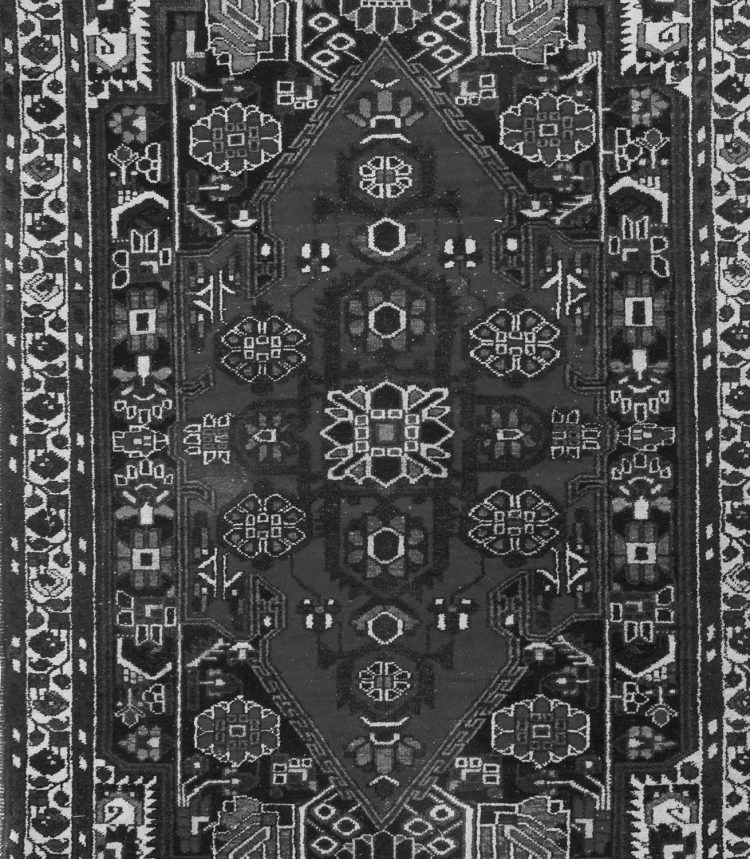

In [219]:
image = Image.open("input/image2.png").convert("L")
image

In [220]:
haralic_matrix = create_haralic_matrix(
    image,
    d=2,
    dx_dy=[(1, 0), (0, 1), (-1, 0), (0, -1)])

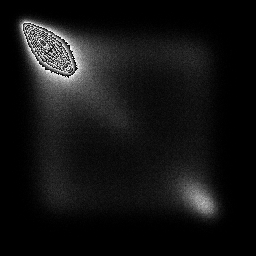

In [221]:
Image.fromarray(haralic_matrix)

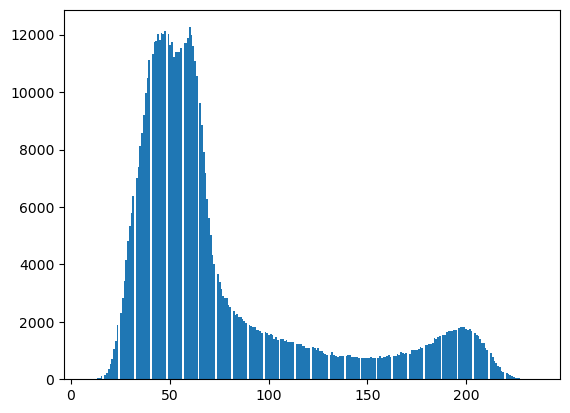

In [222]:
image_array = np.array(image).flatten()
plt.hist(image_array, bins=256)
plt.show()

In [223]:
calc_con(haralic_matrix)

3991620331

In [224]:
calc_lun(haralic_matrix)

46858.11047123536

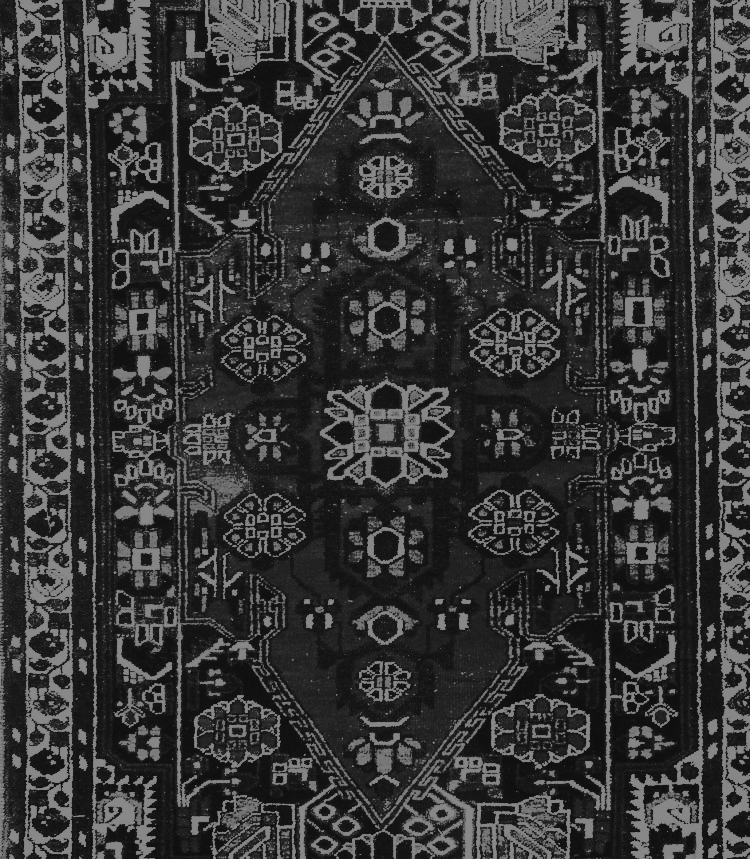

In [225]:
contrast_image = log_contrast_transform(image, l=9)
contrast_image

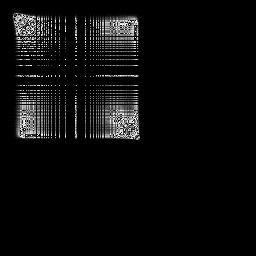

In [226]:
contrast_haralic_matrix = create_haralic_matrix(
    contrast_image,
    d=2,
    dx_dy=[(1, 0), (0, 1), (-1, 0), (0, -1)])

Image.fromarray(contrast_haralic_matrix)

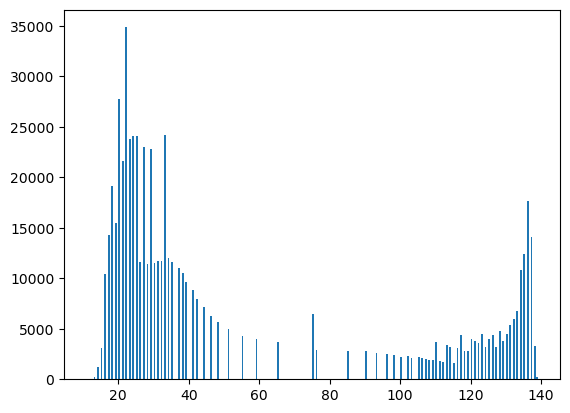

In [227]:
plt.hist(np.array(contrast_image).flatten(), bins=256)
plt.show()